<a href="https://colab.research.google.com/github/mumtazharis/PCVK_MumtazHaris/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pyplot as plt
import requests

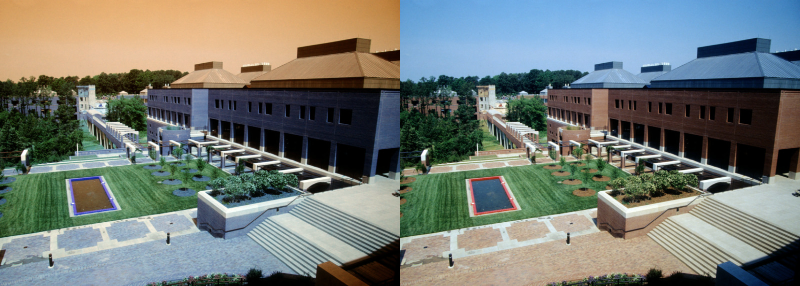

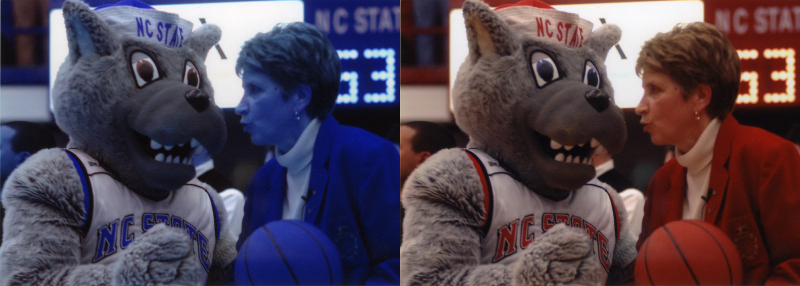

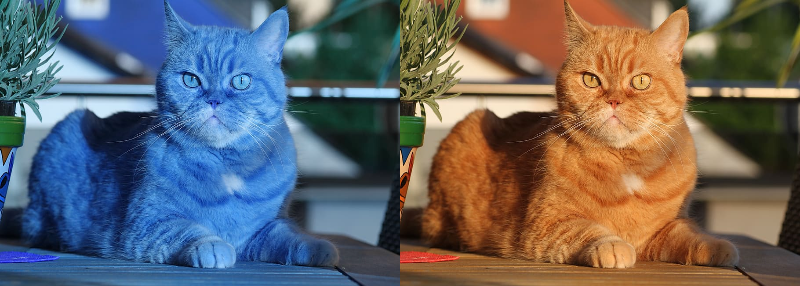

In [12]:
urls = [
    "https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
    "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
    "https://www.newsdone.com/wp-content/uploads/2020/08/cat-british-shorthair-cat-s-eyes-british.jpg"
]

# Header untuk request
headers = {'User-Agent': 'Mozilla/5.0'}

# Loop pada tiap URL image
for url in urls:
    # Mengirimkan request ke server
    response = requests.get(url, headers=headers)

    # Periksa apakah request berhasil
    if response.status_code == 200:
        # Konversi konten gambar ke format yang dapat dibaca oleh OpenCV
        image_arr = np.asarray(bytearray(response.content), dtype=np.uint8)
        image = cv.imdecode(image_arr, cv.IMREAD_COLOR)

        # Resize gambar
        image_2 = cv.resize(image, (400, 286))

        # Konversi ke RGB
        image = cv.cvtColor(image_2, cv.COLOR_BGR2RGB)

        # Menggabungkan dua image secara horizontal
        final_frame = cv.hconcat((image, image_2))

        # Menampilkan gambar
        cv2_imshow(final_frame)
        print('\n')

resolusi image: tinggi x lebar =  286  x  400


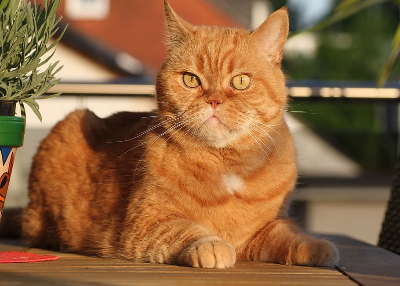

In [13]:
tinggi = image_2.shape[0]
lebar = image_2.shape[1]
print("resolusi image: tinggi x lebar = ", tinggi, " x ", lebar)
cv2_imshow(image_2)
#

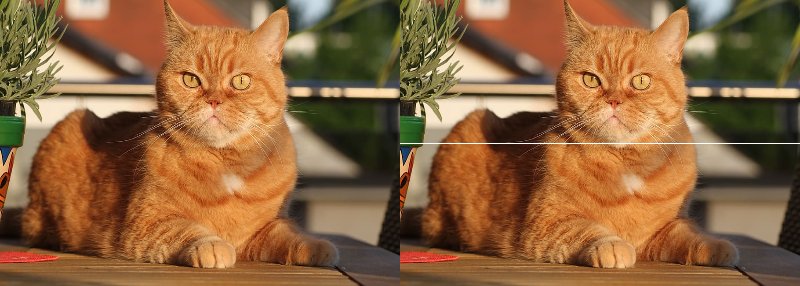

In [14]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#membuat garis horizontal ditengah image
for y in range(lebar):
  image_3[int((tinggi)/2),y] = [255,255,255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)
#

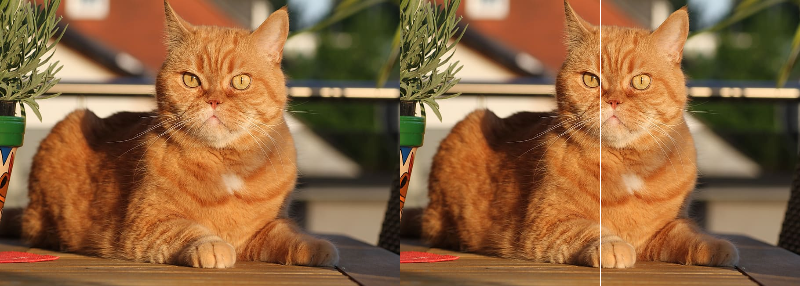

In [15]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#membuat garis horizontal ditengah image
for x in range(tinggi):
  image_3[x, int((lebar)/2)] = [255,255,255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

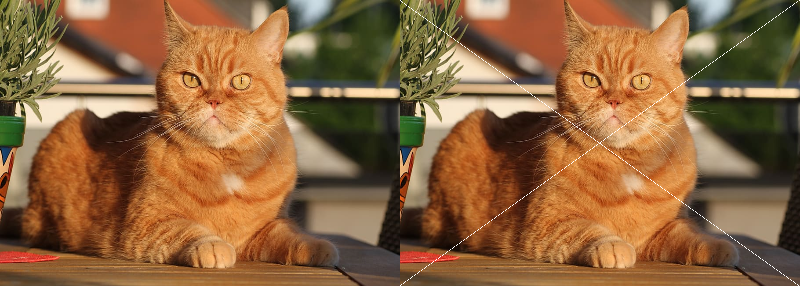

In [16]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

for i in range(tinggi):
    # Garis diagonal dari kiri atas ke kanan bawah
    x = int(i * (lebar / tinggi))
    image_3[i, x] = [255, 255, 255]

    # Garis diagonal dari kanan atas ke kiri bawah
    x_inverse = int(lebar - i * (lebar / tinggi) - 1)
    image_3[i, x_inverse] = [255, 255, 255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

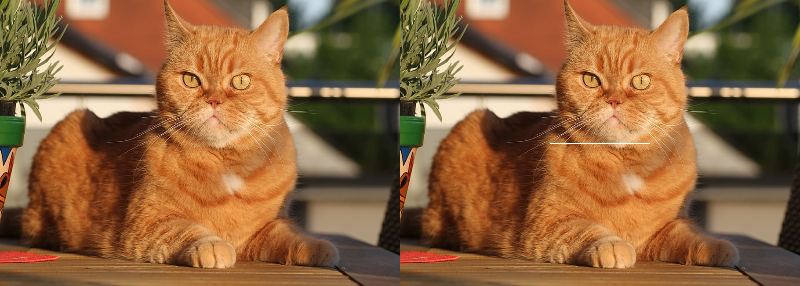

In [17]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#membuat garis horizontal ditengah image
# Menentukan panjang garis
panjang_garis = 100  # Ganti dengan panjang garis yang diinginkan

# Menentukan titik awal dan akhir dari garis
titik_awal = max(0, int(lebar/2 - panjang_garis/2))  # Pastikan tidak melebihi batas kiri gambar
titik_akhir = min(lebar, int(lebar/2 + panjang_garis/2))  # Pastikan tidak melebihi batas kanan gambar

# Membuat garis horizontal di tengah image dengan panjang tertentu
for y in range(titik_awal, titik_akhir):
    image_3[int(tinggi/2), y] = [255, 255, 255]  # Warna garis putih

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)
#

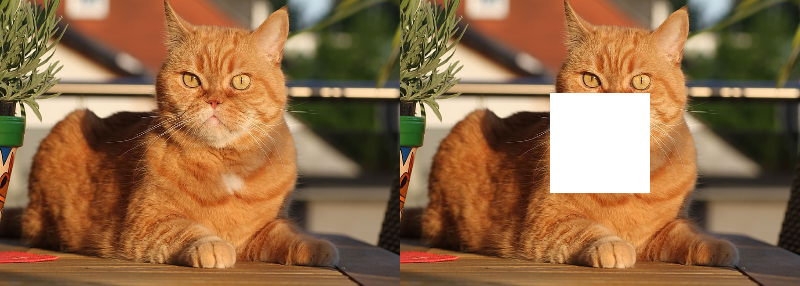

In [18]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Menentukan panjang garis
panjang_sisi = 100  # Ganti dengan panjang garis yang diinginkan

# Menentukan lebar awal dan akhir dari garis
lebar_awal = max(0, int(lebar/2 - panjang_sisi/2))  # Pastikan tidak melebihi batas kiri gambar
lebar_akhir = min(lebar, int(lebar/2 + panjang_sisi/2))  # Pastikan tidak melebihi batas kanan gambar

# Menentukan tinggi awal dan akhir dari garis
tinggi_awal = max(0, int(tinggi/2 - panjang_sisi/2))  # Pastikan tidak melebihi batas kiri gambar
tinggi_akhir = min(lebar, int(tinggi/2 + panjang_sisi/2))  # Pastikan tidak melebihi batas kanan gambar

# Membuat garis horizontal di tengah image dengan panjang tertentu
for y in range(lebar_awal, lebar_akhir):
  for x in range(tinggi_awal, tinggi_akhir):
      image_3[x , y] = [255, 255, 255]  # Warna garis putih

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)
#

In [ ]:
Pertanyaan
1. Menggunakan google colab karena kita tidak perlu melakukan instalasi secara manual
   dan bisa dijalankan secara online untuk memudahkan kolaborasi.
2. NumPy menyediakan array multidimensional yang efisien untuk menyimpan dan memanipulasi data besar,
   Pandas menyediakan data structures dan data analysis tools untuk memanipulasi dan menganalisis data,
   OpenCV adalah library computer vision yang digunakan untuk berbagai tugas, seperti image processing,
   Scikit-image adalah library image processing dan computer vision yang menyediakan berbagai fungsi untuk image manipulation, analisis, dan segmentasi,
   Matplotlib adalah library untuk membuat visualisasi data, termasuk static, animated, dan interactive visualizations.
   Dan iya semua library tersebut digunakan dalam praktikum ini, jadi harus digunakan semua
3. Untuk me-resize image dan karena fx dan fy = 0.5 jadi image di-resize dari ukuran aslinya menjadi setengah.
4. Menentukan warna dari garis horizontal yang akan dibuat di tengah gambar menjadi warna putih.
5. Semakin tinggi resolusi, semakin banyak piksel yang digunakan untuk merepresentasikan gambar, sehingga kualitas dan ketajaman gambar meningkat.



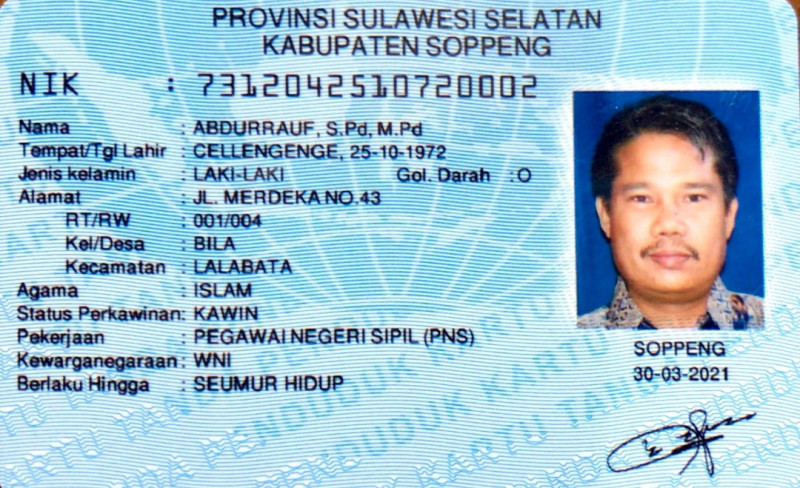

In [19]:
gambarKTP = cv.imread("/content/drive/MyDrive/KTP.jpg")

cv2_imshow(gambarKTP)

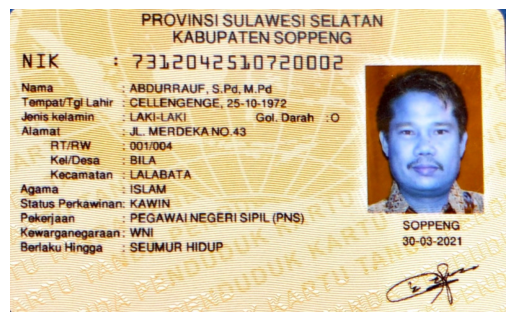

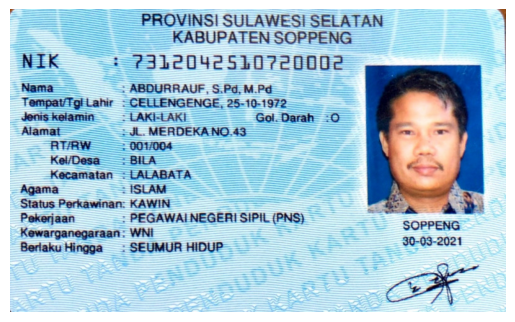

In [20]:
import cv2 as cv
import matplotlib.pyplot as plt

# Membaca gambar dari file lokal
gambarKTP = cv.imread('/content/drive/MyDrive/KTP.jpg')

# Mengubah gambar dari BGR ke RGB
gambarKTP_rgb = cv.cvtColor(gambarKTP, cv.COLOR_BGR2RGB)

# Menampilkan gambar menggunakan Matplotlib
plt.imshow(gambarKTP)
plt.axis('off')  # Menyembunyikan sumbu
plt.show()
print('\n')
plt.imshow(gambarKTP_rgb)
plt.axis('off')  # Menyembunyikan sumbu
plt.show()


resolusi image: tinggi x lebar =  488  x  800


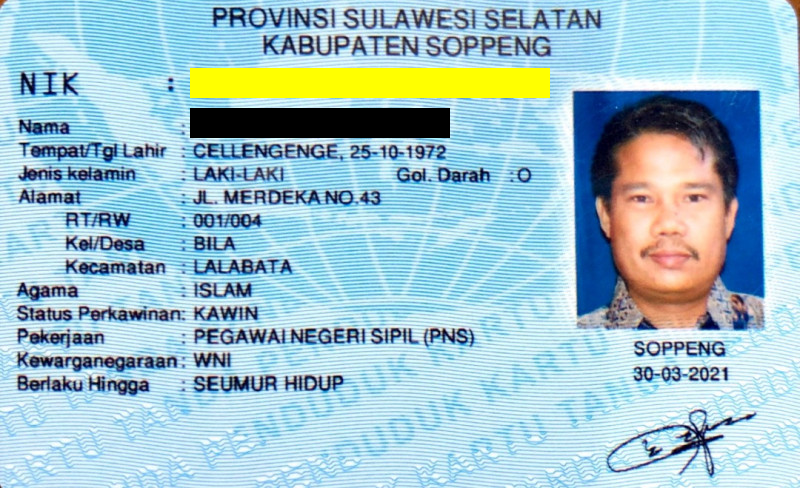

In [24]:
gambarKTP = cv.imread('/content/drive/MyDrive/KTP.jpg')
tinggi = gambarKTP.shape[0]
lebar = gambarKTP.shape[1]

print("resolusi image: tinggi x lebar = ", tinggi, " x ", lebar)


#menutup NIK
# Menentukan lebar awal dan akhir dari garis
lebar_awal = int(lebar-610)
lebar_akhir = int(lebar-250)

# Menentukan tinggi awal dan akhir dari garis
tinggi_awal = int(tinggi-420)
tinggi_akhir = int(tinggi-390)

# Membuat garis horizontal di tengah image dengan panjang tertentu
for y in range(lebar_awal, lebar_akhir):
  for x in range(tinggi_awal, tinggi_akhir):
      gambarKTP[x , y] = [0, 255, 255]  # Warna garis kuning

#menutup Nama
# Menentukan lebar awal dan akhir dari garis
lebar_awal = int(lebar-610)
lebar_akhir = int(lebar-350)

# Menentukan tinggi awal dan akhir dari garis
tinggi_awal = int(tinggi-380)
tinggi_akhir = int(tinggi-350)

# Membuat garis horizontal di tengah image dengan panjang tertentu
for y in range(lebar_awal, lebar_akhir):
  for x in range(tinggi_awal, tinggi_akhir):
      gambarKTP[x , y] = [0, 0, 0]  # Warna garis kuning

cv2_imshow(gambarKTP)

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
